# U.S. Medical Insurance Costs Analysis Project

### By: Iyinoluwa 'Yinnie' Akenroye 

#### October 2024

## Project Background: 

This project is to analyze the US Medical Insurance Costs dataset to derive insights from the data, which had been prior cleaned and tidied on KAGGLE website.

Additionally, the goal is predict the insurance cost that will be charged to a person when provided specific parameters such as: their age, sex, bmi, no. of children, smoking habits, and the region where they live in the US.

## Methodology:

Firstly, a descriptive analysis will be done to describe major patterns in the data through summary statistics and visualization of measures of central tendency and spread, 
e.g the mean, median, range, IQR and Std deviation.

Secondly, an exploratory analysis will be done to explore the correlation and relationship between the different quantitative and qualitative  variables of the dataset. 

### Descriptive and Explorative Data Analysis

#### i.) Summary Statistics: the mean, median, range, IQR and Std deviation of the numeric variables

- mean and median of insurance charges, ages, bmi, no of children
- range, IQR and Std Dev. of insurance charges, ages, bmi, no of children
- Average bmi for sexes
- Average / median insurance costs for sexes
- Average / Median insurance costs for smokers and non-smokers across the entire population
- Average / Median insurance costs for smokers and non-smokers grouped by sexes
- Average / Median insurance costs of dwellers across the different regions.
- Average / Median insurance costs of dwellers across the different regions, split by smokers and non-smokers


#### ii.) Summary Statistics: frequency, proportion and ratios of the categorical variables

- Frequency and proportion of dwellers in the different regions
- Frequency and proportion of male and female across the entire dataset
- Proportion of male and female grouped by region
- Ratio of smokers to non smokers across the entire dataset
- Proportion of smokers to non-smokers grouped by region
- Proportion of smokers to non-smokers grouped by sexes


#### iii.) Relationship between dependent and independent qualitative and quantitative variables

- Smoker habit and Sex
- Smoker habit and Region
- Smoker Habits and Insurance costs
- No. of children and Insurance costs
- Age and insurance costs
- Bmi and insurance costs

#### iv.) Prediction of the insurance charges to be paid by an individual based on the strongest correlating variables

- Numeric Variables: Age, BMI, No. of children
- Categorical Variables: Region, Sex, Smoker Habits

## Results and Observations:

In [1]:
import csv, pandas as pd, numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency, pearsonr
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
insurance_df = pd.read_csv('insurance.csv')
    
print(insurance_df['sex'].dtype)

object


In [5]:
print(insurance_df.head(10))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


In [41]:
#Defining a class with methods for the analysis
class MedicalInsurance:
    def __init__(self, data=insurance_df):
        self.data = data
    
    def calc_mean(self, column_name):
        mean = self.data[column_name].mean()
        return mean
    
    def calc_median(self, column_name):
        median = self.data[column_name].median()
        return median
    
    def calc_range(self, column_name):
        max_num = self.data[column_name].max()
        min_num = self.data[column_name].min()
        range_num = max_num - min_num
        return range_num
    
    def calc_iqr(self, column_name):
        q3 = self.data[column_name].quantile(0.75)
        q1 = self.data[column_name].quantile(0.25)
        iqr = q3 - q1
        return iqr
    
    def calc_std(self, column_name):
        std_num = self.data[column_name].std()
        return std_num
    
    
    def find_outliers(self, column_name):
        q1 = self.data[column_name].quantile(0.25)
        q3 = self.data[column_name].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5*iqr
        upper_bound = q3 + 1.5*iqr
        outliers = insurance_df[(insurance_df[column_name] < lower_bound) | (insurance_df[column_name] > upper_bound)]
        return outliers
    
    def calc_mean_by_group(self, column_name, *group_by_col):
        mean_by_group = self.data.groupby(list(group_by_col))[column_name].mean().reset_index()
        return mean_by_group
    
    def calc_median_by_group(self, column_name, *group_by_col):
        median_by_group = self.data.groupby(list(group_by_col))[column_name].median().reset_index()
        return median_by_group
    
    def calc_freq(self, *column_name):
        freq = self.data.groupby(list(column_name))['charges'].count().reset_index()
        freq.rename(columns={'charges':'frequency'}, inplace=True)
        return freq
        # A more efficient way is:
        # freq = self.data.column_name.value_counts()
    
    def calc_proportion(self, *column_name):
        len_data = len(self.data)
        freq = self.calc_freq(*column_name)
        freq['proportion (%)'] = freq['frequency'].apply(lambda x: f"{(x/len_data)*100:.2f}")
        return freq
        # A more efficient way is:
        # freq = self.data.column_name.value_counts(normalize=True)

    def calc_chi2_contingency(self, column_1, column_2):
        col1_col2_freq = pd.crosstab(self.data[column_1], self.data[column_2])
        chi2, pval, dof, expected = chi2_contingency(col1_col2_freq)
        return chi2
    
    def calc_pearson_corr(self, column_1, column_2):
        corr_col1_col2, p = pearsonr(self.data[column_1], self.data[column_2])
        return corr_col1_col2
    
    def draw_boxplot(self, x_axis, y_axis):
        sns.boxplot(data=self.data, x=x_axis, y=y_axis)
        plt.show()
        plt.close()
    
    def draw_histplot(self, column_name, subdata, label, color):
        plt.hist(self.data[column_name][subdata], color=color, label=label, density=True, alpha=0.5)
        plt.show()
    
    def draw_scatterplot(self, x_axis, y_axis):
        plt.scatter(x=self.data[x_axis], y=self.data[y_axis])
        plt.xlabel(x_axis)
        plt.ylabel(y_axis)
        plt.show()
        plt.close()
    
    def charges_predictor(self, age, sex, region, smoker):
        model = sm.OLS.from_formula('charges ~ age + C(sex) + C(region) + C(smoker)', self.data)
        results = model.fit()
        new_data = {'age': [age], 'sex': [sex], 'region': [region], 'smoker': [smoker]}
        result = results.predict(new_data)
        return result
    

### -  Summary Statistics for Numeric Variables

##### Calculating the mean and median of insurance charges, ages, bmi, no of children


In [42]:
kaggle_dataset = MedicalInsurance()

mean_insurance_charges = kaggle_dataset.calc_mean('charges')
mean_age = kaggle_dataset.calc_mean('age')
mean_bmi = kaggle_dataset.calc_mean('bmi')
mean_children = kaggle_dataset.calc_mean('children')


median_insurance_charges = kaggle_dataset.calc_median('charges')
median_age = kaggle_dataset.calc_median('age')
median_bmi = kaggle_dataset.calc_median('bmi')
median_children = kaggle_dataset.calc_median('children')

print(f"Insurance Charges - the mean value is: ${mean_insurance_charges:,.2f} ; the median value is ${median_insurance_charges:,.2f}")
print(f"Age - the mean value is: {mean_age:,.0f}yrs ; the median value is {median_age:,.0f}yrs")
print(f"BMI - the mean value is: {mean_bmi:,.2f} ; the median value is {median_bmi:,.2f}")
print(f"No. of Children - the mean value is: {mean_children:,.0f} child(ren); the median value is {median_children:,.0f} child(ren)")

Insurance Charges - the mean value is: $13,270.42 ; the median value is $9,382.03
Age - the mean value is: 39yrs ; the median value is 39yrs
BMI - the mean value is: 30.66 ; the median value is 30.40
No. of Children - the mean value is: 1 child(ren); the median value is 1 child(ren)


#### Insights Derived: 
- From the analysis above the age, bmi and children variables display a normal distribution, as the median and mean values of those variables are almost equal with a +/- 0.2 difference. For these variables, the mean value is a great representation of the dataset.
- Whereas, the Insurance charges show a wide difference (+/- 4,000) between its median and mean values, indicating that there are some large outlier values that pull the mean value to the left, making it left-skewed. In this case the median value will be a better representative of the dataset.

##### Finding the outliers in the Insurance Charges variable

In [8]:
print(kaggle_dataset.find_outliers('charges'))

      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[139 rows x 7 columns]


Further analysis will be done to gain insights on the contributing factors of the outliers.

##### Calculating the range, IQR and Std Dev. of insurance charges, ages, bmi, no of children

In [9]:
range_insurance_charges = kaggle_dataset.calc_range('charges')
range_age = kaggle_dataset.calc_range('age')
range_bmi = kaggle_dataset.calc_range('bmi')
range_children = kaggle_dataset.calc_range('children')


iqr_insurance_charges = kaggle_dataset.calc_iqr('charges')
iqr_age = kaggle_dataset.calc_iqr('age')
iqr_bmi = kaggle_dataset.calc_iqr('bmi')
iqr_children = kaggle_dataset.calc_iqr('children')

std_insurance_charges = kaggle_dataset.calc_std('charges')
std_age = kaggle_dataset.calc_std('age')
std_bmi = kaggle_dataset.calc_std('bmi')
std_children = kaggle_dataset.calc_std('children')


print(f"Insurance Charges - the range is: ${range_insurance_charges:,.2f} ; the IQR is ${iqr_insurance_charges:,.2f} ; the Std. Dev is: ${std_insurance_charges:,.2f} ; the mean value is: ${mean_insurance_charges:,.2f} ; the median value is ${median_insurance_charges:,.2f}")
print(f"Age - the range is: {range_age:,.0f}yrs ; the IQR is {iqr_age:,.0f}yrs ; the Std. Dev is: {std_age:,.0f}yrs ; the mean value is: {mean_age:,.0f}yrs ; the median value is {median_age:,.0f}yrs")
print(f"BMI - the range is: {range_bmi:,.2f} ; the IQR is {iqr_bmi:,.2f} ; the Std. Dev is: {std_bmi:,.2f} ; the mean value is: {mean_bmi:,.2f} ; the median value is {median_bmi:,.2f}")
print(f"No. of Children - the range is: {range_children:,.0f} children; the IQR is {iqr_children:,.0f} children; the Std. Dev is: {std_children:,.0f} children ; the mean value is: {mean_children:,.0f} child(ren) ; the median value is {median_children:,.0f} child(ren)")

Insurance Charges - the range is: $62,648.55 ; the IQR is $11,899.63 ; the Std. Dev is: $12,110.01 ; the mean value is: $13,270.42 ; the median value is $9,382.03
Age - the range is: 46yrs ; the IQR is 24yrs ; the Std. Dev is: 14yrs ; the mean value is: 39yrs ; the median value is 39yrs
BMI - the range is: 37.17 ; the IQR is 8.40 ; the Std. Dev is: 6.10 ; the mean value is: 30.66 ; the median value is 30.40
No. of Children - the range is: 5 children; the IQR is 2 children; the Std. Dev is: 1 children ; the mean value is: 1 child(ren) ; the median value is 1 child(ren)


#### Insights Derived: 
- From the analysis above:
    - **Insurance charges**: The *range* is quite large, indicating a significant difference between the smallest and largest values in the dataset. This suggests that there might be some extreme values or outliers. An *IQR* of USD 11,899.63 suggests that the central portion of the data is relatively tightly clustered compared to the overall range. This indicates that while there are extreme values, the bulk of the data is more consistent. The *standard deviation* is close to the mean, suggesting that the data points are spread out around the mean, but not excessively so. It indicates moderate variability in the dataset.
    - **Age**: The *range* is quite large, indicating a significant difference between the smallest and largest values in the dataset. This suggests that there might be some extreme values or outliers. An *IQR* of 24 yrs suggests that the central portion of the data is relatively tightly clustered compared to the overall range. This indicates that while there are extreme values, the bulk of the data is more consistent. The *standard deviation* is larger than 30% of the mean, suggesting that the overall dataset is more spread out due to a few extreme values. The dataset has a wide age range, but the central ages are more consistent, with variability primarily due to outliers.
    - **BMI**: The *range* indicates a significant difference between the smallest and largest values in the dataset, suggesting the presence of diverse values or potential outliers. An *IQR* of 8.40 suggests that the central portion of the dataset is relatively tightly clustered compared to the overall range, indicating consistency among the middle values. The *standard deviation* of 6.10 is about 20% of the mean and suggests moderate variability in the dataset, with values spread out slightly around the mean. 
    - **Children**: The *range* indicates a difference of 5 children between the smallest and largest values in the dataset. This suggests the presence of diverse family sizes or potential outliers. An *IQR* of 2 children suggests that the central portion of the dataset is relatively tightly clustered, indicating consistency among the middle values. The *standard deviation* of 1 child suggests low variability in the dataset, with most values close to the mean. The dataset has a wide range due to a few families with significantly more children, but the central tendency is towards smaller family sizes.

##### Calculating the average bmi and average / median insurance costs by sex

In [10]:
avg_bmi_by_sex = kaggle_dataset.calc_mean_by_group('bmi', 'sex')
avg_cost_by_sex = kaggle_dataset.calc_mean_by_group('charges', 'sex')
median_cost_by_sex = kaggle_dataset.calc_median_by_group('charges', 'sex')
avg_med_cost_by_sex = avg_cost_by_sex.merge(median_cost_by_sex, on='sex').round(2)
avg_med_cost_by_sex = avg_med_cost_by_sex.rename(columns={'charges_x':'Average Costs ($)', 'charges_y':'Median Costs($)'})
    
print("sex :  Average BMI")
for row in avg_bmi_by_sex.iterrows():
    print(f"{row[1]['sex']}: {row[1]['bmi']:.2f}")
    
print('\n', avg_med_cost_by_sex)

sex :  Average BMI
female: 30.38
male: 30.94

       sex  Average Costs ($)  Median Costs($)
0  female           12569.58          9412.96
1    male           13956.75          9369.62


#### Insights Derived: 
- On the average, the male sex has a higher insurance cost than the female sex, but has a lower median cost than the female sex.
  This implies the presence of larger outlier values in the male sex insurance costs which are not present in the female category.
- On the average, the male sex has a higher bmi than the female sex.

##### Calculating the average / median insurance costs for smokers and non-smokers across the entire population

In [11]:
avg_cost_by_smoking = kaggle_dataset.calc_mean_by_group('charges', 'smoker')
med_cost_by_smoking = kaggle_dataset.calc_median_by_group('charges', 'smoker')
avg_med_cost_by_smoking = avg_cost_by_smoking.merge(med_cost_by_smoking, on='smoker').round(2)
avg_med_cost_by_smoking.rename(columns={'charges_x' : 'Average Costs ($)', 'charges_y': 'Median Costs ($)'}, inplace=True)

print(avg_med_cost_by_smoking)

  smoker  Average Costs ($)  Median Costs ($)
0     no            8434.27           7345.41
1    yes           32050.23          34456.35


#### Insights Derived: 
- On the average, smokers pay approximately 400% the insurance costs paid by non-smokers, across the entire population.
- While smokers pay approximately 500% the median insurance costs paid by non-smokers, across the entire population.

##### Calculating the average / median insurance costs for smokers and non-smokers grouped by sexes

In [12]:
avg_cost_by_smoker_sex = kaggle_dataset.calc_mean_by_group('charges', 'sex', 'smoker')
med_cost_by_smoker_sex = kaggle_dataset.calc_median_by_group('charges', 'sex', 'smoker')

avg_med_cost_by_smoker_sex = avg_cost_by_smoker_sex.merge(med_cost_by_smoker_sex, on=['sex', 'smoker']).round(2)

avg_med_cost_by_smoker_sex.rename(columns={'charges_x': 'Average Costs ($)','charges_y': 'Median Costs($)','smoker_x': 'Smoker','smoker_y':'Smoker','sex':'Sex'}, inplace=True)

print(avg_med_cost_by_smoker_sex)

      Sex smoker  Average Costs ($)  Median Costs($)
0  female     no            8762.30          7639.42
1  female    yes           30679.00         28950.47
2    male     no            8087.20          6985.51
3    male    yes           33042.01         36085.22


#### Insights Derived: 
- On the average, female smokers pay approximately 9% less costs than male smokers; while the median costs are app. 22% less than their male counterparts. 
- On the average, female non-smokers pay approximately 9% more costs than male non-smokers; while the median costs are app. 10% more than their male counterparts. This implies the presence of large outlier values in the female smokers dataset.

- On the average, Male smokers pay approximately 4 times that of male non-smokers, while the median costs are 5 times more than that of the male non-smokers. This implies the presence of large outlier values in the make non-smokers dataset.

- On the average, female smokers pay approximately 4 times the insurance costs of female non-smokers, while the median costs are also 4 times that of the female non-smokers. This implies slight variability in the female dataset.

##### Calculating the average / median insurance costs of dwellers across the different regions.

In [13]:
avg_cost_by_region = kaggle_dataset.calc_mean_by_group('charges', 'region')
med_cost_by_region = kaggle_dataset.calc_median_by_group('charges', 'region')

avg_med_cost_by_region = avg_cost_by_region.merge(med_cost_by_region, on='region')
                                                             
print("Region: Average Costs - Median Costs")

for row in avg_med_cost_by_region.iterrows():
    print(f"{row[1]['region']}: ${row[1]['charges_x']:,.2f}  -  ${row[1]['charges_y']:,.2f}")

Region: Average Costs - Median Costs
northeast: $13,406.38  -  $10,057.65
northwest: $12,417.58  -  $8,965.80
southeast: $14,735.41  -  $9,294.13
southwest: $12,346.94  -  $8,798.59


#### Insights Derived: 
- On the average, The SouthEast region has the highest insurance costs while the SouthWest region has the lowest.
- However, the NorthEast region has the highest Median Costs while the SouthWest region remians the lowest.
- This implies that the SouthEast region contains the most outlier insurance cost values. 
- Drawing from insights earlier derived, the smokers in the South East region present the largest outlier insurance costs.

##### Calculating the average / median insurance costs of dwellers across the different regions, split by smokers and non-smokers

In [14]:
avg_cost_by_region_smoker = kaggle_dataset.calc_mean_by_group('charges', 'region', 'smoker')
med_cost_by_region_smoker = kaggle_dataset.calc_median_by_group('charges', 'region', 'smoker')

avg_med_cost_by_region_smoker = avg_cost_by_region_smoker.merge(med_cost_by_region_smoker, on=['region', 'smoker']).round(2)

avg_med_cost_by_region_smoker.rename(columns={'region':'Region', 'charges_x':'Average Costs ($)', 'charges_y':'Median Costs ($)', 'smoker':'Smoker'}, inplace=True)

avg_med_cost_by_region_smoker['Average Costs ($)'] = avg_med_cost_by_region_smoker['Average Costs ($)'].apply(lambda x: f"{x:,.2f}")
avg_med_cost_by_region_smoker['Median Costs ($)'] = avg_med_cost_by_region_smoker['Median Costs ($)'].apply(lambda x: f"{x:,.2f}")

print(avg_med_cost_by_region_smoker)

      Region Smoker Average Costs ($) Median Costs ($)
0  northeast     no          9,165.53         8,342.91
1  northeast    yes         29,673.54        28,101.33
2  northwest     no          8,556.46         7,256.72
3  northwest    yes         30,192.00        27,489.00
4  southeast     no          8,032.22         6,652.53
5  southeast    yes         34,845.00        37,484.45
6  southwest     no          8,019.28         7,348.14
7  southwest    yes         32,269.06        35,165.26


#### Insights Derived: 
- For Smokers: The SouthEast region has the highest average insurance costs, while the NorthEast region has the lowest average insurance costs. Moreover, the SouthEast region has the highest median insurance costs, while the NorthWest region has the lowest median insurance costs.

- For Non-Smokers: The NorthEast region has the highest average insurance costs, while the SouthWest region has the lowest average insurance costs, which is closesly followed by the SouthEast. Moreover, the NorthEast region has the highest median insurance costs, while the SouthEast region has the lowest median insurance costs.

- This implies that the SouthEast region offers the most favorable insurance costs for non-smokers, but it offers the least favorable costs for smokers; While the NorthEast offers the most favorable costs for smokers, but offers the least favorable costs for non-smokers, compared to other regions. 

- We can possibly infer that there are a lot of smokers in the NorthEast region while there are a lot of non-smokers in the SouthEast region.

### -  Summary Statistics for Categorical Variables

##### Calculating the Frequency and proportion of dwellers in the different regions

In [15]:
region_proportion = kaggle_dataset.calc_proportion('region')
print(region_proportion)

      region  frequency proportion (%)
0  northeast        324          24.22
1  northwest        325          24.29
2  southeast        364          27.20
3  southwest        325          24.29


##### Calculating the Frequency and proportion of male and female across the entire dataset

In [16]:
sex_proportion = kaggle_dataset.calc_proportion('sex')
print(sex_proportion)

      sex  frequency proportion (%)
0  female        662          49.48
1    male        676          50.52


#### Insights Derived:
- The males are only 1% higher in proportion than the females in the dataset.

##### Calculating the Proportion of male and female grouped by region

In [17]:
region_sex_proportion = kaggle_dataset.calc_proportion('region','sex')
pvt_region_sex_proportion = region_sex_proportion.pivot(columns='region', index='sex', values='proportion (%)')
print(pvt_region_sex_proportion)
print('\n', region_sex_proportion)

region northeast northwest southeast southwest
sex                                           
female     12.03     12.26     13.08     12.11
male       12.18     12.03     14.13     12.18

       region     sex  frequency proportion (%)
0  northeast  female        161          12.03
1  northeast    male        163          12.18
2  northwest  female        164          12.26
3  northwest    male        161          12.03
4  southeast  female        175          13.08
5  southeast    male        189          14.13
6  southwest  female        162          12.11
7  southwest    male        163          12.18


#### Insights Derived:
- All the regions have evenly distributed population between the males and females, with the exception of the SoutEast region which is 1% - 2% higher in population than all other regions.

##### Calculating the ratio of smokers to non smokers across the entire dataset

In [18]:
freq_smokers = kaggle_dataset.calc_freq('smoker')
print(freq_smokers)

smokers = freq_smokers.iloc[1]['frequency']

non_smokers = freq_smokers.iloc[0]['frequency']

print(f"\nThe ratio of smokers to non-smokers is {smokers/smokers:.0f}:{non_smokers/smokers:.0f}")

  smoker  frequency
0     no       1064
1    yes        274

The ratio of smokers to non-smokers is 1:4


##### Calculating the proportion of smokers to nonsmokers grouped by region

In [19]:
region_smoker_proportion = kaggle_dataset.calc_proportion('region','smoker')

pvt_region_smoker_proportion = region_smoker_proportion.pivot(columns='region', index='smoker', values='proportion (%)')

print(pvt_region_smoker_proportion)

print('\n', region_smoker_proportion)

region northeast northwest southeast southwest
smoker                                        
no         19.21     19.96     20.40     19.96
yes         5.01      4.33      6.80      4.33

       region smoker  frequency proportion (%)
0  northeast     no        257          19.21
1  northeast    yes         67           5.01
2  northwest     no        267          19.96
3  northwest    yes         58           4.33
4  southeast     no        273          20.40
5  southeast    yes         91           6.80
6  southwest     no        267          19.96
7  southwest    yes         58           4.33


#### Insights Derived:
- There is an even distribution of smokers and non-smokers across the NorthWest hand SouthWest regions. 
- However, the NorthEast has a higher proportion of smokers the other 2 regions which have similar population distribution, this might be encouraged by the fact that its Insurance costs are favorable to smokers in its region.
- Although the SouthEast region has the highest proportion of smokers in the region, it also has the highest proportion of population distribution.

##### Calculating the proportion of smokers to non-smokers grouped by sexes

In [20]:
sex_smoker_proportion = kaggle_dataset.calc_proportion('sex','smoker')

pvt_sex_smoker_proportion = sex_smoker_proportion.pivot(columns='sex', index='smoker', values='proportion (%)')

print(pvt_sex_smoker_proportion)

print('\n',sex_smoker_proportion)

sex    female   male
smoker              
no      40.88  38.64
yes      8.59  11.88

       sex smoker  frequency proportion (%)
0  female     no        547          40.88
1  female    yes        115           8.59
2    male     no        517          38.64
3    male    yes        159          11.88


#### Insights Derived:
- There is a 2% higher percentage of female non-smokers than male non-smokers in the dataset.
- There is a 3% higher percentage of male smokers than female smokers in the dataset.

### - Relationship between dependent and independent qualitative and quantitative variables

##### Exploring the relationship between Smoker habit and Sex

In [21]:
smoker_sex_rel = kaggle_dataset.calc_chi2_contingency('smoker', 'sex').round(2)
print(smoker_sex_rel)

7.39


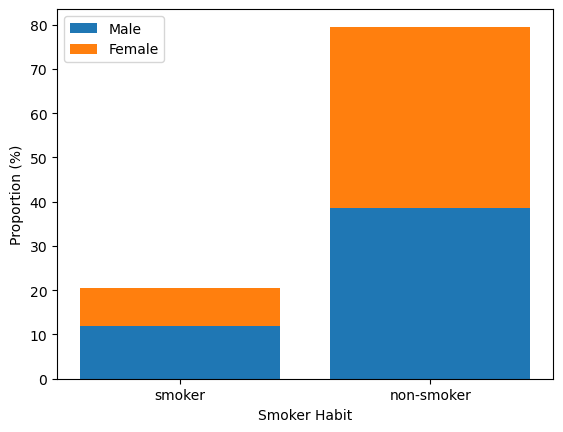

In [55]:
x_values = ['smoker', 'non-smoker']
male_smoker_values = pvt_sex_smoker_proportion.loc['yes'].loc['male']
male_nonsmoker_values = pvt_sex_smoker_proportion.loc['no'].loc['male']
female_smoker_values = pvt_sex_smoker_proportion.loc['yes'].loc['female']
female_nonsmoker_values = pvt_sex_smoker_proportion.loc['no'].loc['female']
y1_values = [float(male_smoker_values), float(male_nonsmoker_values)]
y2_values = [float(female_smoker_values), float(female_nonsmoker_values)]

plt.bar(range(len(x_values)), y1_values)
plt.bar(range(len(x_values)), y2_values, bottom=y1_values)
ax = plt.subplot()
ax.set_xticks([0, 1])
ax.set_xticklabels(x_values)
plt.xlabel('Smoker Habit')
plt.ylabel('Proportion (%)')
plt.legend(['Male', 'Female'])
plt.show()

#### Insights Derived:
- For a two dimensional matrix, a chi2 of above 4 implies that there is an association between the two qualitative variables.
- Thus, a smoker is more likely to be associated with the male sex over the female sex.
- From earlier insights drawn, the smoker population has approximately 4% higher males than females.

##### Exploring the relationship between Smoker habit and Region

In [30]:
smoker_region_rel = kaggle_dataset.calc_chi2_contingency('smoker', 'region').round(2)
print(smoker_region_rel)

7.34


region northeast northwest southeast southwest
smoker                                        
no         19.21     19.96     20.40     19.96
yes         5.01      4.33      6.80      4.33
region
northeast    5.01
northwest    4.33
southeast    6.80
southwest    4.33
Name: yes, dtype: object


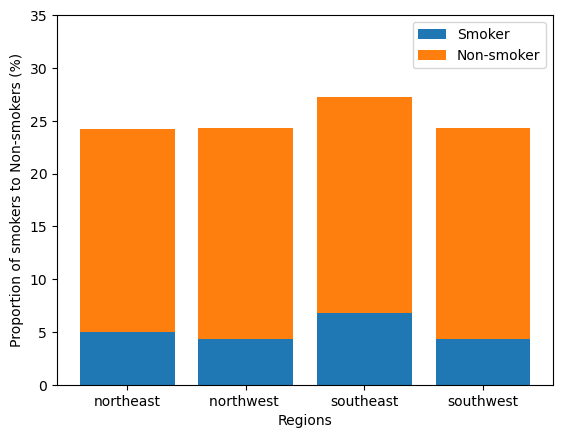

In [63]:
x_values = ['northeast', 'northwest ', 'southeast', 'southwest']

print(pvt_region_smoker_proportion)
print(pvt_region_smoker_proportion.loc['yes'])

northeast_smoker_values = pvt_region_smoker_proportion.loc['yes'].loc['northeast']
northeast_nonsmoker_values = pvt_region_smoker_proportion.loc['no'].loc['northeast']
northwest_smoker_values = pvt_region_smoker_proportion.loc['yes'].loc['northwest']
northwest_nonsmoker_values = pvt_region_smoker_proportion.loc['no'].loc['northwest']
southeast_smoker_values = pvt_region_smoker_proportion.loc['yes'].loc['southeast']
southeast_nonsmoker_values = pvt_region_smoker_proportion.loc['no'].loc['southeast']
southwest_smoker_values = pvt_region_smoker_proportion.loc['yes'].loc['southwest']
southwest_nonsmoker_values = pvt_region_smoker_proportion.loc['no'].loc['southwest']

y1_values = [float(northeast_smoker_values), float(northwest_smoker_values), float(southeast_smoker_values), float(southwest_smoker_values)]
y2_values = [float(northeast_nonsmoker_values), float(northwest_nonsmoker_values), float(southeast_nonsmoker_values), float(southwest_nonsmoker_values)]

plt.bar(range(len(x_values)), y1_values)
plt.bar(range(len(x_values)), y2_values, bottom=y1_values)
ax = plt.subplot()
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(x_values)
plt.xlabel('Regions')
plt.ylabel('Proportion of smokers to Non-smokers (%)')
plt.legend(['Smoker', 'Non-smoker'])
plt.ylim(0, 35) #To increase the top margin of the graph
plt.show()

#### Insights Derived:
- For a two dimensional matrix, a chi2 of above 4 implies that there is an association between smoker habits and region.
- Thus, a smoker is more likely to be associated with the SouthEast region over others.
- The NorthEast has a higher proportion of smokers the other 2 regions which have similar population distribution.
- The SouthEast region has the highest proportion of smokers in the region and also the highest population, overall.

##### Exploring the relationship between Smoker habits and insurance costs (Boxplot, histplot)

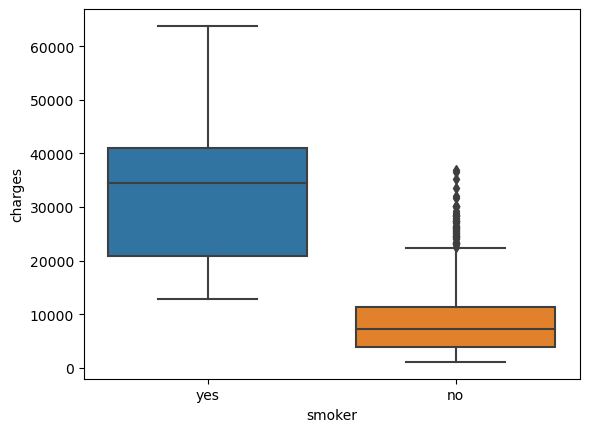

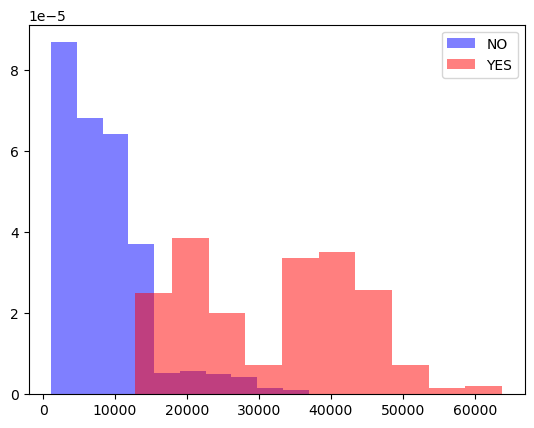

In [31]:
kaggle_dataset.draw_boxplot('smoker', 'charges')
plt.hist(kaggle_dataset.data['charges'][kaggle_dataset.data['smoker'] == 'no'], color="blue", label="NO", density=True, alpha=0.5)
plt.hist(kaggle_dataset.data['charges'][kaggle_dataset.data['smoker'] == 'yes'], color="red", label="YES", density=True, alpha=0.5)
plt.legend()
plt.show()
plt.close()

#### Insights Derived:
- The boxplot clearly shows that there is no overlap between the boxes of smokers vs non-smoker, further indicating an association of higher insurance costs with smokers, and lesser insurance costs with non-smokers.

##### Exploring the relationship between no. of children and insurance costs (pearson)

In [24]:
children_insur_correl = kaggle_dataset.calc_pearson_corr('children', 'charges').round(2)
print(children_insur_correl)

0.07


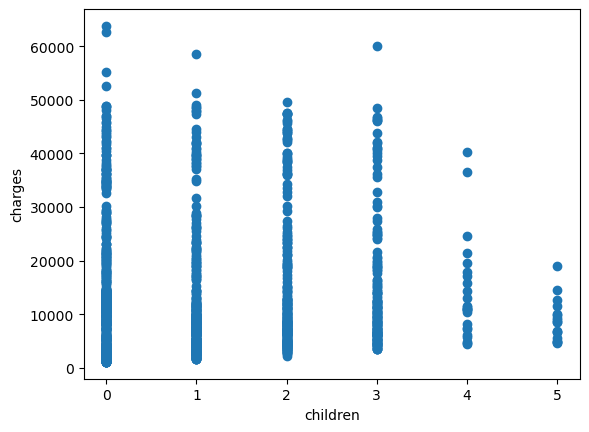

In [25]:
kaggle_dataset.draw_scatterplot('children', 'charges')

#### Insights Derived:
- The Pearson coefficient of 0.07 is very close to zero, indicating no association with the number of children that one has and the insurance charges to be paid.

##### Exploring the relationship between Age and insurance costs (pearson)

In [26]:
age_insur_correl = kaggle_dataset.calc_pearson_corr('age', 'charges').round(2)
print(age_insur_correl)

0.3


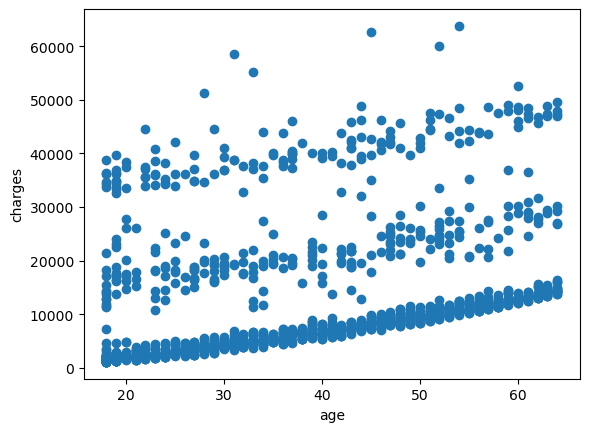

In [27]:
kaggle_dataset.draw_scatterplot('age', 'charges')

#### Insights Derived:
-  The Pearson coefficient of 0.3 is slightly positive, indicating a weak positive association with one's age and the insurance charges to be paid.

##### Exploring the relationship between Age and insurance costs, for both sexes (line plot)

C:\Users\Yinnie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


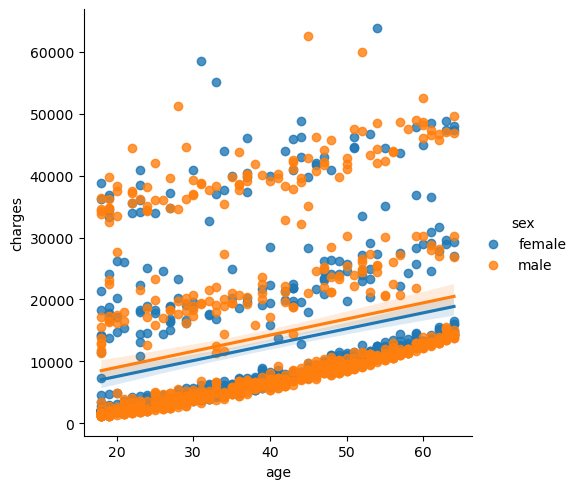

In [70]:
# print(kaggle_dataset.data.head())
insurance_data = kaggle_dataset.data
sns.lmplot(x='age', y='charges', hue='sex', data=insurance_data)
plt.tightlayout()
plt.show()

#### Insights Derived:
- The Male gender have higher insurance costs than the female gender, on the average.

##### Exploring the relationship between BMI and insurance costs (pearson)

In [28]:
bmi_insur_correl = kaggle_dataset.calc_pearson_corr('bmi', 'charges').round(2)
print(bmi_insur_correl)

0.2


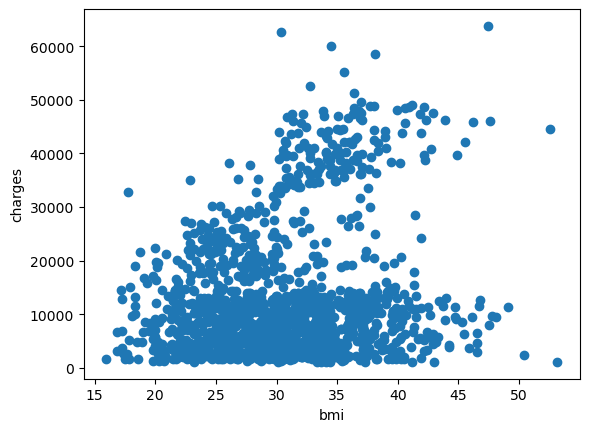

In [29]:
kaggle_dataset.draw_scatterplot('bmi', 'charges')

#### Insights Derived:
-  The Pearson coefficient of 0.2 is slightly higher than zero, indicating a very weak positive association with one's BMI and the insurance charges to be paid.

##### Exploring the relationship between BMI and insurance costs, for both sexes (line plot)

C:\Users\Yinnie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


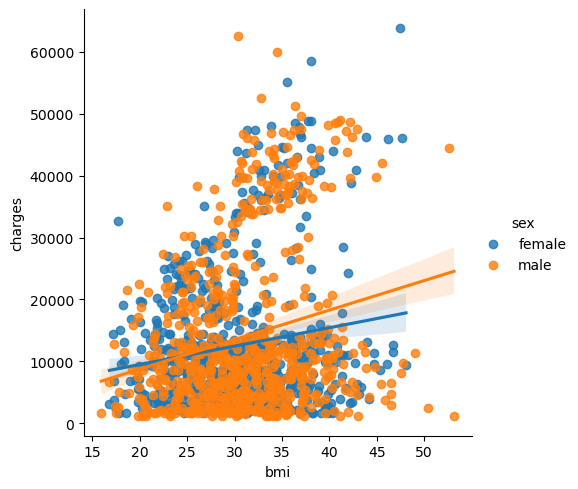

In [12]:
insurance_data = kaggle_dataset.data
sns.lmplot(x='bmi', y='charges', hue='sex', data=insurance_data)
plt.show()

#### Insights Derived:
-  At BMI levels lower than 27, the females have a higher insurance costs than the males, on average.
-  At BMI levels above 27, the males have a higher insurance cost than the females, on average.

### - Predict insurance charges based on age, bmi, children, smoking habit, region and gender

In [17]:
print(kaggle_dataset.data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [47]:
#To predict the charges for the first five observations of the data.

prediction_1 = kaggle_dataset.charges_predictor(19, 'female', 'southwest', 'yes')
prediction_2 = kaggle_dataset.charges_predictor(18, 'male', 'southeast', 'no')
prediction_3 = kaggle_dataset.charges_predictor(28, 'male', 'southeast', 'no')
prediction_4 = kaggle_dataset.charges_predictor(33, 'male', 'northwest', 'no')
prediction_5 = kaggle_dataset.charges_predictor(32, 'male', 'northwest', 'no')

print(prediction_1)
print(prediction_2)
print(prediction_3)
print(prediction_4)
print(prediction_5)

0    26225.472184
dtype: float64
0    3062.371628
dtype: float64
0    5813.913017
dtype: float64
0    6504.743661
dtype: float64
0    6229.589522
dtype: float64


## Conclusion:

- A smoker is more likely to be associated with the SouthEast region over the other three regions.
The NorthEast has a higher proportion of smokers the other 2 regions which have similar population distribution.
The SouthEast region has the highest proportion of smokers in the region and also the highest population, overall.

- The smoker population has approximately 4% higher males than females and a smoker is more likely to be associated with the male sex over the female sex.

- There is an association of higher insurance costs with smokers, and lesser insurance costs with non-smokers.

- There is no association with the number of children that one has and the insurance charges to be paid.

- There is a weak positive association with one's age and the insurance charges to be paid.

- The Male gender have higher insurance costs than the female gender, on the average.

- There is a very weak positive association with one's BMI and the insurance charges to be paid.

- At BMI levels lower than 27, the females have a higher insurance costs than the males; while at BMI levels above 27, the males have a higher insurance cost than the females, on average.